In [1]:
import anndata
import itertools
import networkx as nx
import pandas as pd
import scanpy as sc
import scglue
import seaborn as sns
from matplotlib import rcParams

In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (6, 6)

In [3]:
rna = anndata.read_h5ad("rna_m_preprocessed.h5ad")
atac = anndata.read_h5ad("atac_m_preprocessed.h5ad")
graph = nx.read_graphml("prior_m.graphml.gz")

In [4]:
rna

AnnData object with n_obs × n_vars = 25479 × 22738
    obs: 'cell', 'group', 'sample', 'cell_type'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'hgnc_id', 'havana_gene', 'tag'
    uns: 'X_name', 'bcds_score', 'cell', 'cell_type_blueprint_broad', 'cell_type_blueprint_fine', 'cell_type_colors', 'cell_type_dice_broad', 'cell_type_dice_fine', 'cell_type_dmap_broad', 'cell_type_dmap_fine', 'cell_type_hpca_broad', 'cell_type_hpca_fine', 'cell_type_monaco_broad', 'cell_type_monaco_fine', 'cellont_abbr', 'cellont_cluster', 'cellont_id', 'cellont_name', 'cluster_20', 'cluster_50', 'group', 'hvg', 'library_size', 'log1p', 'n_features', 'neighbors', 'partition_20', 'partition_50', 'pca', 'percent_mito', 'sample', 'signature_adrenergic', 'signature_mesenchymal', 'signature_

In [5]:
atac

AnnData object with n_obs × n_vars = 21170 × 181500
    obs: 'orig.ident', 'nCount_peaks', 'nFeature_peaks', 'TSS_fragments', 'DNase_sensitive_region_fragments', 'enhancer_region_fragments', 'promoter_region_fragments', 'on_target_fragments', 'blacklist_region_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'passed_filters', 'duplicate', 'cell_id', 'is__cell_barcode', 'nucleosome_signal', 'nucleosome_percentile', 'nucleosome_group', 'TSS.enrichment', 'TSS.percentile', 'high.tss', 'pct_reads_in_peaks', 'blacklist_ratio', 'peaks_snn_res.0.8', 'seurat_clusters', 'nCount_RNA', 'nFeature_RNA', 'activ.ident', 'new.ident', 'active.ident', 'ident'
    var: 'n_cells', 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
    uns: 'X_name', 'neighbors', 'new.ident_colors', 'umap'
    obsm: 'SCOPEN', 'UMAP_SCOPEN', 'X_lsi', 'X_umap'
    layers: 'logcounts'
    obsp: 'connectivities', 'distances'

In [6]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

In [7]:
scglue.models.configure_dataset(
    atac, "NB", use_highly_variable=True,
    use_rep="X_lsi"
)

In [8]:
graph = graph.subgraph(itertools.chain(
    rna.var.query("highly_variable").index,
    atac.var.query("highly_variable").index
))

In [9]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "atac": atac}, graph,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using CPU as computation device.
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 12499
[INFO] SCGLUEModel: Setting `max_epochs` = 74
[INFO] SCGLUEModel: Setting `patience` = 7
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 4
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.441, 'g_kl': 0.012, 'g_elbo': 0.453, 'x_rna_nll': 0.268, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.278, 'x_atac_nll': 0.175, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.176, 'dsc_loss': 0.689, 'vae_loss': 0.472, 'gen_loss': 0.437}, val={'g_nll': 0.44, 'g_kl': 0.012, 'g_elbo': 0.452, 'x_rna_nll': 0.266, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.276, 'x_atac_nll': 0.173, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.174, 'dsc_los

2023-02-10 23:35:52,407 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "44"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...
[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (26, 18)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 12499
[INFO] SCGLUEModel: Setting `align_burnin` = 13
[INFO] SCGLUEModel: Setting `max_epochs` = 74
[INFO] SCGLUEModel: Setting `patience` = 7
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 4
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.41, 'g_kl': 0.009, 'g_elbo': 0.42, 'x_rna_nll': 0.264, 'x_rn

2023-02-11 00:19:52,340 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "39"...


In [10]:
dx = scglue.models.integration_consistency(
    glue, {"rna": rna, "atac": atac}, graph#, count_layers={"rna": "counts"}
)
dx

[INFO] integration_consistency: Using layer "counts" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "atac"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "rna"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "atac"
[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 10 common metacells...
[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 20 common metacells...
[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 50 common metacells...
[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_co

,n_meta,consistency
0,10,0.183540
1,20,0.141629
2,50,0.101219
3,100,0.078269
4,200,0.057340


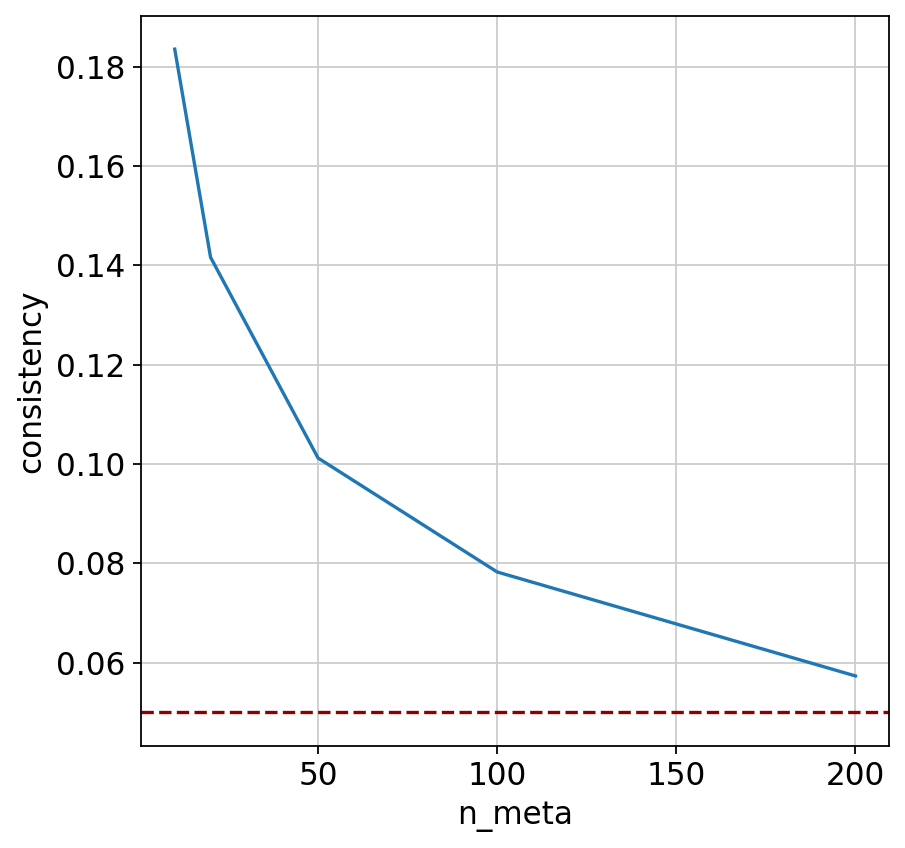

In [11]:
#_ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")
sns_plot = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")
sns_plot.figure.savefig("consistency_plot_myeloid.svg")

In [12]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)

In [13]:
combined = anndata.concat([rna, atac])

/home/people/rohit/miniconda3/envs/mypython3/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [17]:
combined.obsm['X_glue']

array([[ 1.9625759e-02, -2.0061280e-03, -8.8947624e-01, ...,
         6.2167775e-03,  2.6440769e-02, -1.6463589e-02],
       [-2.4787741e-02, -2.0474268e-02,  6.7541695e-01, ...,
         2.7707186e-02, -8.2148965e-03,  4.9462193e-03],
       [-2.1732707e-02, -1.8461397e-02,  1.5797486e+00, ...,
         2.8385939e-03, -2.0958506e-02,  4.6641488e-02],
       ...,
       [ 1.8115900e-02,  2.1819342e-03, -4.8869285e-01, ...,
        -1.1960570e-02, -1.8753635e-02, -1.9539107e-02],
       [ 6.2724948e-03, -6.4381305e-03, -5.3770751e-01, ...,
         5.7844222e-03,  3.1090109e-02, -3.1458971e-03],
       [-2.8729253e-04, -1.6720889e-02, -8.3974606e-01, ...,
        -3.1849802e-02,  2.3784048e-03,  7.8978166e-03]], dtype=float32)

In [18]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)

In [16]:
combined.uns['neighbors']

OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'cosine', 'use_rep': 'X_glue'}}
With overloaded keys:
	['connectivities', 'distances'].

In [19]:
combined

AnnData object with n_obs × n_vars = 46649 × 0
    obs: 'balancing_weight'
    uns: 'neighbors', 'umap'
    obsm: 'X_umap', 'X_glue'
    obsp: 'distances', 'connectivities'

In [20]:
combined.obs['balancing_weight']

AAAGAACAGATTCGAA-1    1.972303
AAAGAACAGCGCTGAA-1    6.001984
AAAGGATTCCATGAGT-1    1.408491
AACAAGACAGCTAACT-1    1.972303
AACAGGGTCTTTCTAG-1    6.001984
                        ...   
TTTGTGTTCTCAGATG-6    0.780814
TTTGTGTTCTCGCGTT-1    1.562754
TTTGTGTTCTCTGACC-5    0.800080
TTTGTGTTCTGAGTCA-3    0.674429
TTTGTGTTCTTGTGCC-6    0.780814
Name: balancing_weight, Length: 46649, dtype: float64

In [21]:
atac.obs

,orig.ident,nCount_peaks,nFeature_peaks,TSS_fragments,DNase_sensitive_region_fragments,enhancer_region_fragments,promoter_region_fragments,on_target_fragments,blacklist_region_fragments,peak_region_fragments,...,blacklist_ratio,peaks_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,activ.ident,new.ident,active.ident,ident,balancing_weight
AAACGAAAGATGCGAC-6,6,8457.0,3978,2637,4660,1956,2039,5055,0,4420,...,0.000000,7,7,5033.0,3837,Monocytes,2018_4252,Monocytes,M,0.780814
AAACGAAAGCTGCCAC-2,2,6301.0,3013,1636,3364,1642,1262,3587,1,3249,...,0.000308,4,4,3151.0,2574,Monocytes,2014_0102,Monocytes,M,0.929361
AAACGAAAGGAAGGTA-6,6,5593.0,2637,1765,3075,1222,1420,3295,0,2889,...,0.000000,7,7,3333.0,2699,Monocytes,2018_4252,Monocytes,M,0.780814
AAACGAAAGGCTGGAT-3,3,11119.0,5139,3007,5919,2791,2152,6490,0,5728,...,0.000000,16,16,6204.0,4515,Monocytes,2020_1288,Monocytes,M,0.583551
AAACGAAAGGTTCTCA-11,11,3837.0,1896,1103,2090,1023,776,2314,0,1979,...,0.000000,5,5,2326.0,1992,Monocytes,2019_5022,Monocytes,M,1.050873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCTCAGATG-6,6,16930.0,7552,4939,9150,4184,3763,9832,0,8825,...,0.000000,7,7,9352.0,6131,Monocytes,2018_4252,Monocytes,M,0.780814
TTTGTGTTCTCGCGTT-1,1,4460.0,2015,1268,2365,1092,970,2530,1,2289,...,0.000437,4,4,2432.0,1799,Monocytes,16_4503,Monocytes,M,1.562754
TTTGTGTTCTCTGACC-5,5,1754.0,647,788,1031,491,248,1526,1,948,...,0.001055,5,5,2349.0,912,Monocytes,2019_5754,Monocytes,M,0.800080
TTTGTGTTCTGAGTCA-3,3,15556.0,6843,4464,8304,3668,3452,8931,0,7963,...,0.000000,4,4,8781.0,5770,Monocytes,2020_1288,Monocytes,M,0.674429


In [22]:
rna.obs

,cell,group,sample,cell_type,balancing_weight
AAAGAACAGATTCGAA-1,AAAGAACAGATTCGAA-1,II,2016_4503,M,1.972303
AAAGAACAGCGCTGAA-1,AAAGAACAGCGCTGAA-1,II,2016_4503,M,6.001984
AAAGGATTCCATGAGT-1,AAAGGATTCCATGAGT-1,II,2016_4503,M,1.408491
AACAAGACAGCTAACT-1,AACAAGACAGCTAACT-1,II,2016_4503,M,1.972303
AACAGGGTCTTTCTAG-1,AACAGGGTCTTTCTAG-1,II,2016_4503,M,6.001984
...,...,...,...,...,...
TTTGGTTAGAGAGGTA-17,TTTGGTTAGAGAGGTA-17,I,2016_2950,M,0.870689
TTTGGTTCACAGCTGC-17,TTTGGTTCACAGCTGC-17,I,2016_2950,M,0.870689
TTTGGTTCACCATTCC-17,TTTGGTTCACCATTCC-17,I,2016_2950,M,0.374691
TTTGGTTTCGAGTCTA-17,TTTGGTTTCGAGTCTA-17,I,2016_2950,M,0.870689


In [23]:
temp_patients = atac.obs['new.ident'].append( rna.obs['sample'])

<ipython-input-23-b39eeb854713>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_patients = atac.obs['new.ident'].append( rna.obs['sample'])


In [24]:
temp_df = atac.obs['activ.ident'].append( rna.obs['cell_type'])

<ipython-input-24-8bd588e1a460>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = atac.obs['activ.ident'].append( rna.obs['cell_type'])


In [25]:
rna.obs['cell_type'].index

Index(['AAAGAACAGATTCGAA-1', 'AAAGAACAGCGCTGAA-1', 'AAAGGATTCCATGAGT-1',
       'AACAAGACAGCTAACT-1', 'AACAGGGTCTTTCTAG-1', 'AACCAACTCGTGCATA-1',
       'AACCCAAAGCTGAGCA-1', 'AACCCAAGTGCGAGTA-1', 'AACCTTTCAAAGCACG-1',
       'AACCTTTTCATCTGTT-1',
       ...
       'TTTGATCGTTATTCTC-17', 'TTTGATCTCGAACGCC-17', 'TTTGATCTCGAGTTGT-17',
       'TTTGGAGTCCTAAGTG-17', 'TTTGGAGTCTGGTGCG-17', 'TTTGGTTAGAGAGGTA-17',
       'TTTGGTTCACAGCTGC-17', 'TTTGGTTCACCATTCC-17', 'TTTGGTTTCGAGTCTA-17',
       'TTTGGTTTCTCCAAGA-17'],
      dtype='object', length=25479)

In [26]:
atac.obs['ident']

AAACGAAAGATGCGAC-6     M
AAACGAAAGCTGCCAC-2     M
AAACGAAAGGAAGGTA-6     M
AAACGAAAGGCTGGAT-3     M
AAACGAAAGGTTCTCA-11    M
                      ..
TTTGTGTTCTCAGATG-6     M
TTTGTGTTCTCGCGTT-1     M
TTTGTGTTCTCTGACC-5     M
TTTGTGTTCTGAGTCA-3     M
TTTGTGTTCTTGTGCC-6     M
Name: ident, Length: 21170, dtype: category
Categories (1, object): ['M']

In [27]:
import pandas as pd
import numpy as np
import random
import string
#temp_df[temp_df.index.duplicated()] atac.obs['activ.ident']
suffix_r = pd.Series(('R' for _ in range(len(rna.obs['cell_type']))), index = rna.obs['cell_type'].index )
suffix_a = pd.Series(('A' for _ in range(len(atac.obs['activ.ident']))), index = atac.obs['activ.ident'].index )

patient_r = pd.Series(('R' for _ in range(len(rna.obs['sample']))), index = rna.obs['sample'].index )
patient_a = pd.Series(('A' for _ in range(len(atac.obs['new.ident']))), index = atac.obs['new.ident'].index )

rna_ident = rna.obs['cell_type'].str.cat(suffix_r,  sep='_')
atac_ident = atac.obs['ident'].str.cat(suffix_a,  sep='_')

rna_patient = rna.obs['sample'].str.cat(patient_r,  sep='_')
atac_patient = atac.obs['new.ident'].str.cat(patient_a,  sep='_')

temp_df = rna_ident.append( atac_ident)
temp_df2 = rna_patient.append(atac_patient)

<ipython-input-27-b4951f0e308f>:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = rna_ident.append( atac_ident)
<ipython-input-27-b4951f0e308f>:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df2 = rna_patient.append(atac_patient)


In [28]:
combined.obs['cells'] = temp_df
combined.obs['sample'] = temp_df2

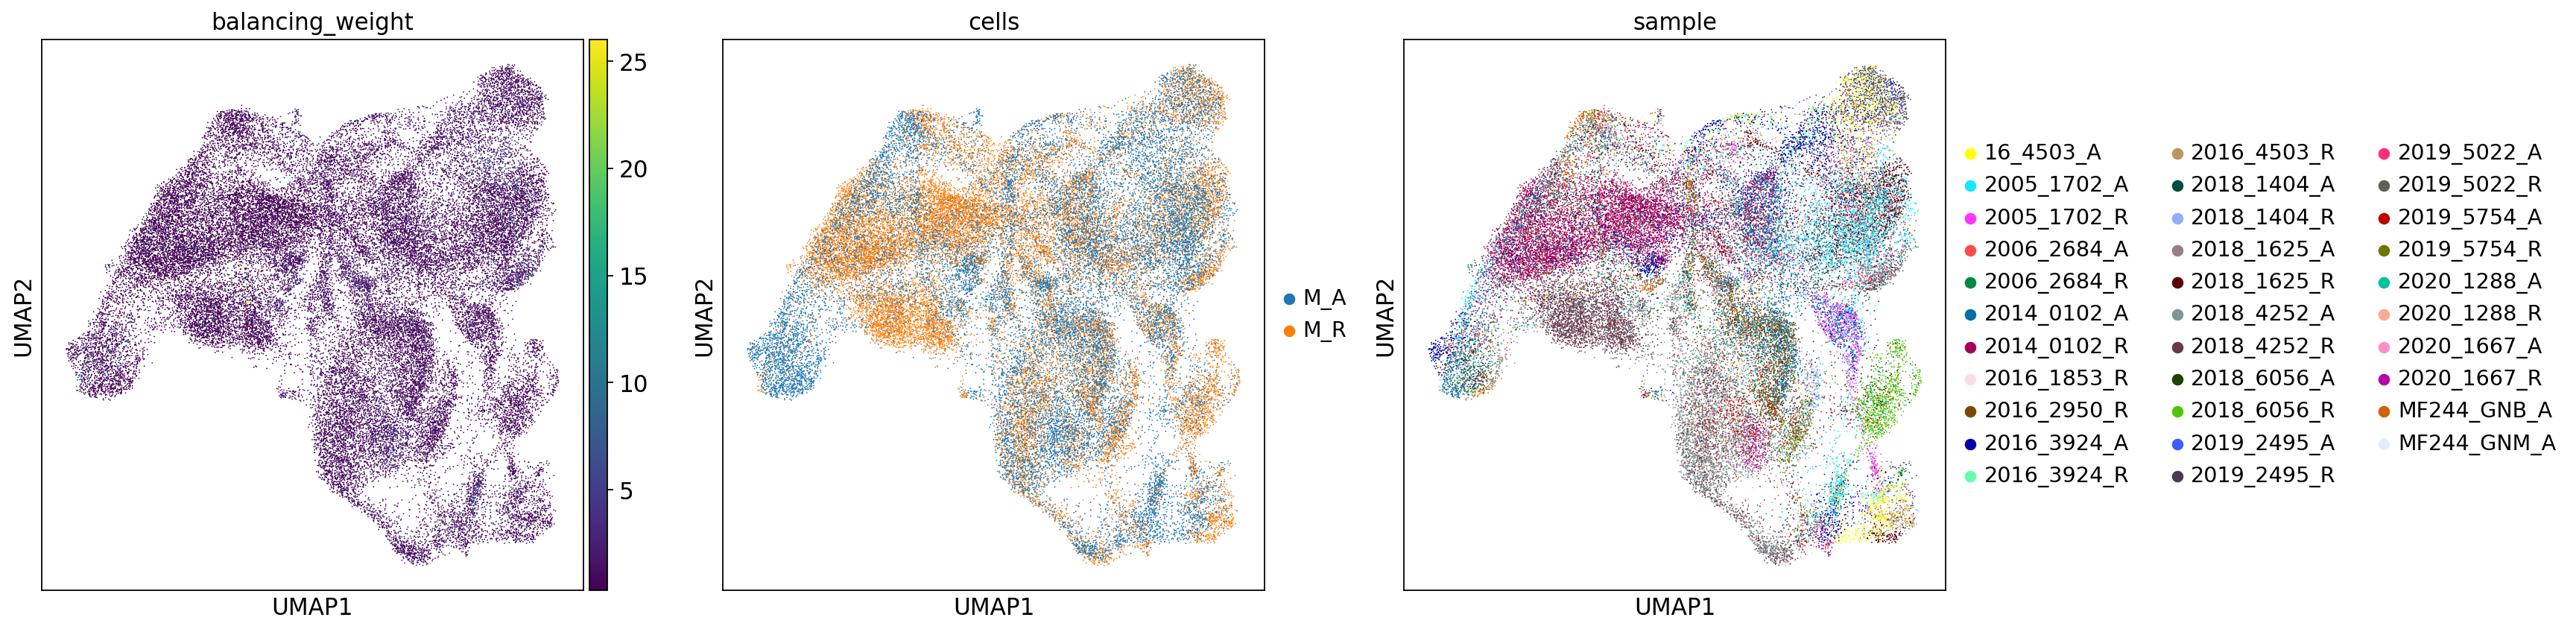

In [31]:
sc.pl.umap(combined, color=['balancing_weight', 'cells', 'sample'], save="integrated_umap.svg")

In [32]:
feature_embeddings = glue.encode_graph(graph)
feature_embeddings = pd.DataFrame(feature_embeddings, index=glue.vertices)
feature_embeddings.iloc[:5, :5]

,0,1,2,3,4
A2M,0.042866,0.000890,-0.002708,0.001862,-0.006197
ABCA1,0.078748,-0.000815,-0.002273,-0.001925,-0.012037
ABCA13,-0.023141,-0.867912,-0.009145,-0.022730,0.004090
ABCC11,0.486843,-0.238419,0.016652,0.008192,-0.006232
ABCC3,-0.326221,-0.005877,-0.002110,0.004986,-0.002102


In [33]:
rna.varm["X_glue"] = feature_embeddings.reindex(rna.var_names).to_numpy()
atac.varm["X_glue"] = feature_embeddings.reindex(atac.var_names).to_numpy()

In [34]:
rna.write("rna-emb_m.h5ad", compression="gzip")
atac.write("atac-emb_m.h5ad", compression="gzip")
nx.write_graphml(graph, "guidance-hvf_m.graphml.gz")